# Task - 9

## Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/HR_comma_sep.csv')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [12]:
df.notna().sum()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

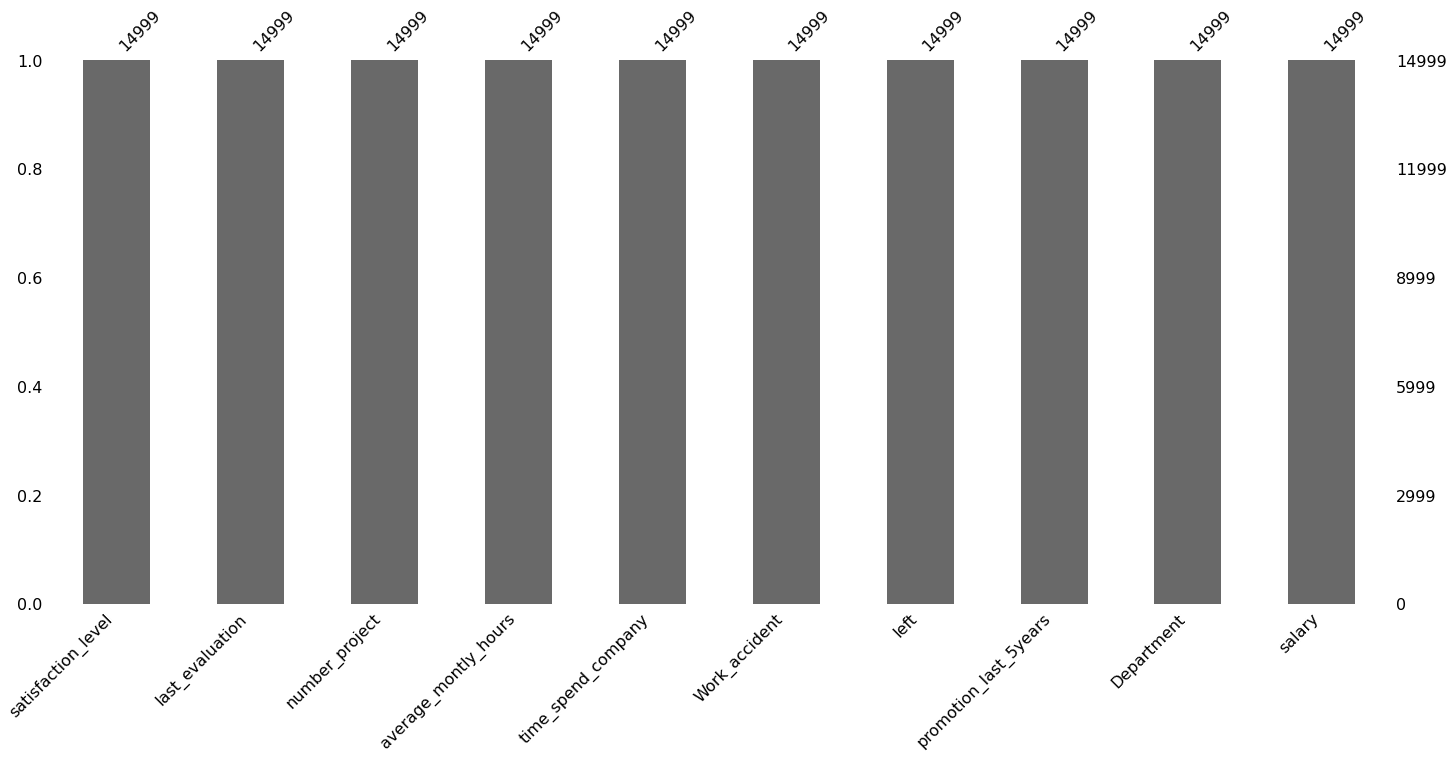

In [13]:
import missingno as msno
msno.bar(df)
plt.show()

In [14]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [15]:
df.Department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: Department, dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder

lab_encoding= LabelEncoder()
df.Department=lab_encoding.fit_transform(df.Department)
df.Department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [17]:
df.salary=lab_encoding.fit_transform(df.salary)
df.salary.unique()

array([1, 2, 0])

In [18]:
df.salary.value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

In [19]:
df.salary.value_counts(normalize=True)

1    0.487766
2    0.429762
0    0.082472
Name: salary, dtype: float64

In [20]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [21]:
df.left.value_counts(normalize=True)


0    0.761917
1    0.238083
Name: left, dtype: float64

In [22]:
x=df.drop(['salary'],axis=1)
y=df['salary']
x,y

(       satisfaction_level  last_evaluation  ...  promotion_last_5years  Department
 0                    0.38             0.53  ...                      0           7
 1                    0.80             0.86  ...                      0           7
 2                    0.11             0.88  ...                      0           7
 3                    0.72             0.87  ...                      0           7
 4                    0.37             0.52  ...                      0           7
 ...                   ...              ...  ...                    ...         ...
 14994                0.40             0.57  ...                      0           8
 14995                0.37             0.48  ...                      0           8
 14996                0.37             0.53  ...                      0           8
 14997                0.11             0.96  ...                      0           8
 14998                0.37             0.52  ...                      0     

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassPredictionError
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, l1_ratio=None, max_iter=100,
 multi_class='auto', n_jobs=None, penalty='l2',
 random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
 warm_start=False)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 2, ..., 1, 1, 1])

In [28]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mse


0.6371717171717172

In [29]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
7231,1,1
12081,1,1
5364,0,2
14589,2,1
2353,1,2
...,...,...
4549,1,2
7460,2,2
2417,2,1
13063,1,1


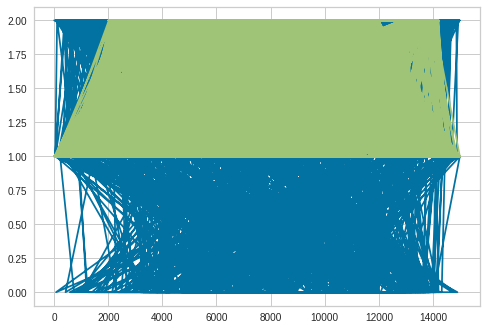

In [31]:
plt.plot(df1)